### Importação dos dados



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [2]:
# Define os nomes das lojas para usar como cabeçalho
cabecalho = ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]

# Lista contendo os DataFrames de cada loja
lojas_df = [loja, loja2, loja3, loja4]

# Calcula o faturamento (soma dos preços) de cada loja
faturamento = [float(df["Preço"].sum()) for df in lojas_df]

# Cria uma lista de tuplas associando o nome da loja ao seu faturamento
faturamento_lojas = list(zip(cabecalho, faturamento))

In [3]:
# Percorre a lista de tuplas contendo o nome da loja e seu respectivo faturamento
for loja_nome, faturamento_total in faturamento_lojas:

   # Formata o faturamento com separador de milhar (.) e vírgula como separador decimal (padrão brasileiro)
   # Exemplo: 12.5 -> '12,50' | 1250.75 -> '1.250,75'
   faturamento_loja = f"{faturamento_total:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".")

   # Imprime a mensagem formatada contendo o nome da loja e seu faturamento
   print(f"O faturamento da {loja_nome} foi de R$ {faturamento_loja}.")

O faturamento da Loja 1 foi de R$ 1.534.509,12.
O faturamento da Loja 2 foi de R$ 1.488.459,06.
O faturamento da Loja 3 foi de R$ 1.464.025,03.
O faturamento da Loja 4 foi de R$ 1.384.497,58.


# 2. Vendas por Categoria


In [4]:
# Para cada DataFrame da lista 'lojas_df', conta quantas vezes cada categoria de produto aparece.
# Isso resulta em uma lista com contagens por categoria para cada loja.
vendas_por_categoria = [df["Categoria do Produto"].value_counts() for df in lojas_df]

# Combina o nome de cada loja com a respectiva contagem de categorias
# Isso gera uma lista de tuplas: (nome da loja, contagem por categoria)
vendas_por_categoria_lojas = list(zip(cabecalho, vendas_por_categoria))

# Exibe a lista resultante com os dados de vendas por categoria para cada loja
vendas_por_categoria_lojas


[('Loja 1',
  Categoria do Produto
  moveis                   465
  eletronicos              448
  brinquedos               324
  eletrodomesticos         312
  esporte e lazer          284
  instrumentos musicais    182
  livros                   173
  utilidades domesticas    171
  Name: count, dtype: int64),
 ('Loja 2',
  Categoria do Produto
  moveis                   442
  eletronicos              422
  brinquedos               313
  eletrodomesticos         305
  esporte e lazer          275
  instrumentos musicais    224
  livros                   197
  utilidades domesticas    181
  Name: count, dtype: int64),
 ('Loja 3',
  Categoria do Produto
  moveis                   499
  eletronicos              451
  brinquedos               315
  eletrodomesticos         278
  esporte e lazer          277
  livros                   185
  instrumentos musicais    177
  utilidades domesticas    177
  Name: count, dtype: int64),
 ('Loja 4',
  Categoria do Produto
  moveis                  

In [5]:
# Percorre cada tupla da lista 'vendas_por_categoria_lojas', que contém o nome da loja e as contagens de categorias
for loja_nome, categoria_counts in vendas_por_categoria_lojas:

    # Imprime o título da análise para a loja atual
    print(f"\nAnálise de vendas por categoria para {loja_nome}:")

    # Percorre cada par (categoria, total de vendas) do resultado da contagem
    for categoria, total in categoria_counts.items():

        # Imprime a categoria e o total de produtos vendidos para a loja atual
        print(f"  - Categoria: {categoria.title()}, Total de produtos vendidos: {total}")


Análise de vendas por categoria para Loja 1:
  - Categoria: Moveis, Total de produtos vendidos: 465
  - Categoria: Eletronicos, Total de produtos vendidos: 448
  - Categoria: Brinquedos, Total de produtos vendidos: 324
  - Categoria: Eletrodomesticos, Total de produtos vendidos: 312
  - Categoria: Esporte E Lazer, Total de produtos vendidos: 284
  - Categoria: Instrumentos Musicais, Total de produtos vendidos: 182
  - Categoria: Livros, Total de produtos vendidos: 173
  - Categoria: Utilidades Domesticas, Total de produtos vendidos: 171

Análise de vendas por categoria para Loja 2:
  - Categoria: Moveis, Total de produtos vendidos: 442
  - Categoria: Eletronicos, Total de produtos vendidos: 422
  - Categoria: Brinquedos, Total de produtos vendidos: 313
  - Categoria: Eletrodomesticos, Total de produtos vendidos: 305
  - Categoria: Esporte E Lazer, Total de produtos vendidos: 275
  - Categoria: Instrumentos Musicais, Total de produtos vendidos: 224
  - Categoria: Livros, Total de produ

# 3. Média de Avaliação das Lojas

In [6]:
# Calcula a média da coluna "Avaliação da compra" para cada DataFrame da lista 'lojas_df'.
# A média é convertida para float e arredondada com 2 casas decimais.
media_avaliacao = [round(float(df["Avaliação da compra"].mean()),2) for df in lojas_df]

# Combina o nome de cada loja (lista 'cabecalho') com a respectiva média de avaliação calculada.
# O resultado é uma lista de tuplas: (nome da loja, média da avaliação)
media_avaliacao_lojas = list(zip(cabecalho, media_avaliacao))

# Exibe a lista resultante com as médias de avaliação por loja
media_avaliacao_lojas

[('Loja 1', 3.98), ('Loja 2', 4.04), ('Loja 3', 4.05), ('Loja 4', 4.0)]

In [7]:
# Percorre cada tupla da lista 'media_avaliacao_lojas', que contém o nome da loja e sua média de avaliação
for loja_nome, media_avaliacao in media_avaliacao_lojas:

    # Imprime a média de avaliação da loja atual de forma formatada
    print(f"A média de avaliação da loja {loja_nome} é de {media_avaliacao}.")


A média de avaliação da loja Loja 1 é de 3.98.
A média de avaliação da loja Loja 2 é de 4.04.
A média de avaliação da loja Loja 3 é de 4.05.
A média de avaliação da loja Loja 4 é de 4.0.


# 4. Produtos Mais e Menos Vendidos

In [8]:
# Para cada DataFrame da lista 'lojas_df', obtém o nome do produto mais vendido (com maior contagem)
produtos_mais_vendidos = [df["Produto"].value_counts().idxmax() for df in lojas_df]

# Para cada DataFrame da lista 'lojas_df', obtém o nome do produto menos vendido (com menor contagem)
produtos_menos_vendidos = [df["Produto"].value_counts().idxmin() for df in lojas_df]

# Combina os nomes das lojas (da lista 'cabecalho') com seus respectivos produtos mais vendidos
# Gera uma lista de tuplas: (nome da loja, produto mais vendido)
produtos_mais_vendidos_lojas = list(zip(cabecalho, produtos_mais_vendidos))

# Combina os nomes das lojas com os respectivos produtos menos vendidos
# Gera uma lista de tuplas: (nome da loja, produto menos vendido)
produtos_menos_vendidos_lojas = list(zip(cabecalho, produtos_menos_vendidos))

# Exibe a lista de produtos mais vendidos por loja
print(produtos_mais_vendidos_lojas)

# Exibe a lista de produtos menos vendidos por loja
print(produtos_menos_vendidos_lojas)

[('Loja 1', 'Micro-ondas'), ('Loja 2', 'Iniciando em programação'), ('Loja 3', 'Kit banquetas'), ('Loja 4', 'Cama box')]
[('Loja 1', 'Headset'), ('Loja 2', 'Jogo de tabuleiro'), ('Loja 3', 'Blocos de montar'), ('Loja 4', 'Guitarra')]


In [9]:
# Imprime um título para a seção de produtos mais vendidos
print("\nProdutos mais vendidos por Loja")

# Percorre a lista de tuplas (loja, produto mais vendido)
for loja_nome, produto_mais_vendido in produtos_mais_vendidos_lojas:

    # Imprime o nome da loja e o produto mais vendido de forma formatada
    print(f"Na loja {loja_nome} o produto mais vendido foi : {produto_mais_vendido}.")

# Imprime um título para a seção de produtos menos vendidos
print("\nProdutos menos vendidos por Loja")

# Percorre a lista de tuplas (loja, produto menos vendido)
for loja_nome, produto_menos_vendido in produtos_menos_vendidos_lojas:

    # Imprime o nome da loja e o produto menos vendido de forma formatada
    print(f"Na loja {loja_nome} o produto menos vendido foi : {produto_menos_vendido}.")


Produtos mais vendidos por Loja
Na loja Loja 1 o produto mais vendido foi : Micro-ondas.
Na loja Loja 2 o produto mais vendido foi : Iniciando em programação.
Na loja Loja 3 o produto mais vendido foi : Kit banquetas.
Na loja Loja 4 o produto mais vendido foi : Cama box.

Produtos menos vendidos por Loja
Na loja Loja 1 o produto menos vendido foi : Headset.
Na loja Loja 2 o produto menos vendido foi : Jogo de tabuleiro.
Na loja Loja 3 o produto menos vendido foi : Blocos de montar.
Na loja Loja 4 o produto menos vendido foi : Guitarra.


# 5. Frete Médio por Loja


In [10]:
# Calcula a média da coluna "Frete" para cada DataFrame da lista 'lojas_df'.
# A média é convertida para float e arredondada para 2 casas decimais.
frete_medio = [round(float(df["Frete"].mean()), 2) for df in lojas_df]

# Combina os nomes das lojas (da lista 'cabecalho') com os respectivos valores médios de frete.
# Gera uma lista de tuplas no formato: (nome da loja, frete médio)
frete_medio_lojas = list(zip(cabecalho, frete_medio))

# Exibe a lista resultante com o frete médio por loja
frete_medio_lojas


[('Loja 1', 34.69), ('Loja 2', 33.62), ('Loja 3', 33.07), ('Loja 4', 31.28)]

In [11]:
# Percorre cada tupla da lista 'frete_medio_lojas', que contém o nome da loja e o valor médio do frete
for loja_nome, frete_medio in frete_medio_lojas:

    # Formata o valor do frete médio para o padrão brasileiro (com vírgula como separador decimal)
    # Exemplo: 12.5 -> '12,50' | 1250.75 -> '1.250,75'
    frete_medio_formatado = f"{frete_medio:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".")

    # Imprime o resultado com o valor formatado
    print(f"O frete médio da loja {loja_nome} é de R$ {frete_medio_formatado}.")


O frete médio da loja Loja 1 é de R$ 34,69.
O frete médio da loja Loja 2 é de R$ 33,62.
O frete médio da loja Loja 3 é de R$ 33,07.
O frete médio da loja Loja 4 é de R$ 31,28.


# 6. Gráficos

In [12]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

## 6.1 Faturamento por Loja

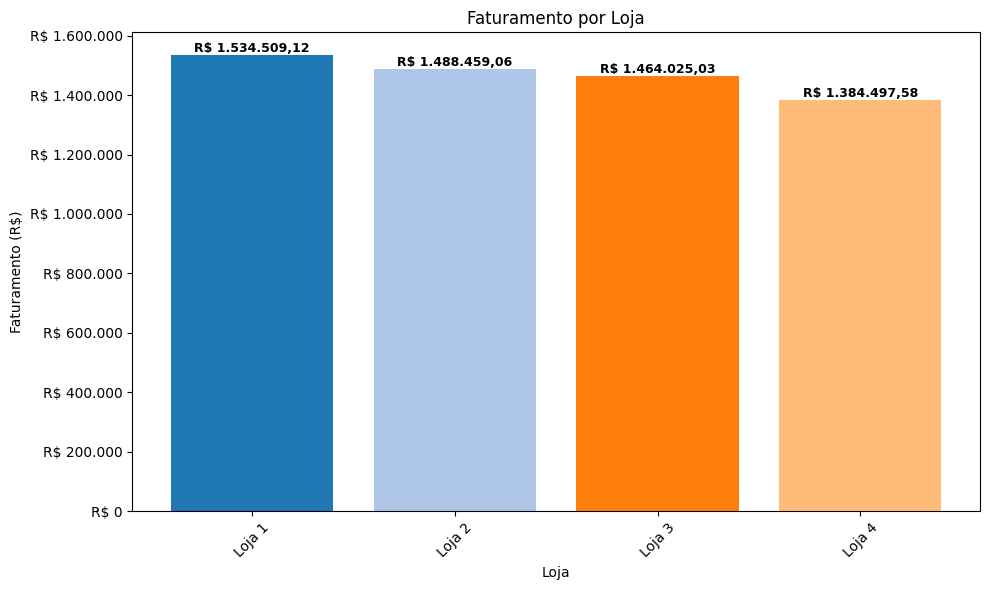

In [13]:
# Geração de cores diferentes para cada loja usando colormap
cores = plt.cm.tab20.colors[:len(cabecalho)]  # Usa até 20 cores únicas

# Criação do gráfico de barras com cores diferentes
plt.figure(figsize=(10, 6))  # Ajuste do tamanho do gráfico
barras = plt.bar(x=cabecalho, height=faturamento, color=cores)

# Título e rótulos dos eixos
plt.title("Faturamento por Loja")
plt.xlabel("Loja")
plt.ylabel("Faturamento (R$)")

# Formata o eixo Y para valores monetários com separador de milhar
plt.gca().yaxis.set_major_formatter(
    ticker.FuncFormatter(lambda x, _: f'R$ {x:,.0f}'.replace(',', 'X').replace('.', ',').replace('X', '.'))
)

# Adiciona os rótulos de valor em cima de cada barra
for barra, valor in zip(barras, faturamento):
    plt.text(
        barra.get_x() + barra.get_width() / 2,  # Centraliza no topo da barra
        barra.get_height(),                    # Posição vertical = altura da barra
        f'R$ {valor:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.'),  # Formatação BRL
        ha='center', va='bottom', fontsize=9, fontweight='bold'
    )

# Rotaciona os nomes das lojas, se necessário
plt.xticks(rotation=45)

# Melhora o layout para evitar cortes
plt.tight_layout()

# Exibe o gráfico
plt.show()


## 6.2 Frete Médio por Loja

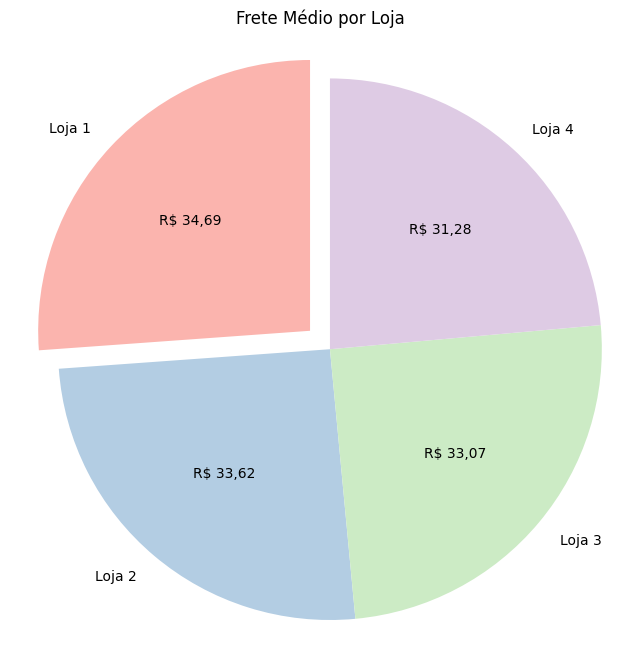

In [14]:
# Separando nomes e valores
labels = [item[0] for item in frete_medio_lojas]
valores = [item[1] for item in frete_medio_lojas]

# Identifica o índice do maior valor para aplicar a explosão
maior_valor_index = valores.index(max(valores))

# Define os valores de explosão: só o maior explode (por exemplo, 0.1)
explode = [0.1 if i == maior_valor_index else 0 for i in range(len(valores))]

# Define as cores
cores = plt.cm.Pastel1.colors[:len(labels)]

# Função personalizada para formatar os valores em reais
def formatar_reais(valor_total):
    def func(pct):
        valor = pct / 100.0 * valor_total
        return f'R$ {valor:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.')
    return func

# Cria o gráfico de pizza com explosão
plt.figure(figsize=(8, 8))
plt.pie(
    valores,
    labels=labels,
    autopct=formatar_reais(sum(valores)),
    explode=explode,
    colors=cores,
    startangle=90
)
plt.title("Frete Médio por Loja")
plt.axis('equal')  # Mantém o gráfico redondo

# Exibe o gráfico
plt.show()


## 6.3 Vendas por Categoria


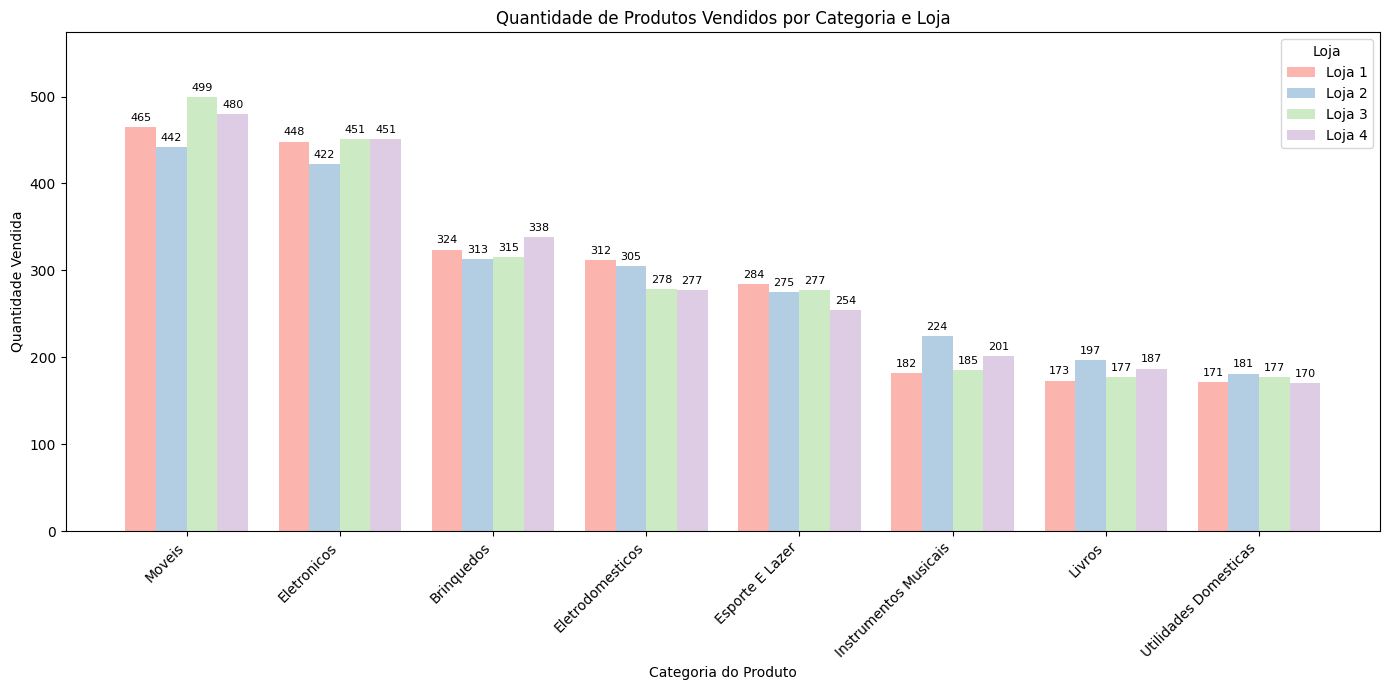

In [15]:
# Pega os nomes das categorias
categorias = [key.title() for key in vendas_por_categoria_lojas[0][1].keys()]
num_categorias = len(categorias)
num_lojas = len(vendas_por_categoria_lojas)

# Prepara a quantidade vendida para cada loja
valores_por_loja = [list(loja[1].tolist()) for loja in vendas_por_categoria_lojas]
labels_lojas = [loja[0] for loja in vendas_por_categoria_lojas]

# Posição das barras
x = np.arange(num_categorias)
largura = 0.2  # largura de cada barra

# Define as cores
#cores = plt.cm.tab10.colors[:num_lojas]
cores = plt.cm.Pastel1.colors[:num_lojas]

# Criando o gráfico
plt.figure(figsize=(14, 7))
for i in range(num_lojas):
    plt.bar(x + i * largura, valores_por_loja[i], width=largura, label=labels_lojas[i], color=cores[i])

    # Adiciona os rótulos de valor no topo de cada barra
    for j, valor in enumerate(valores_por_loja[i]):
        plt.text(x[j] + i * largura, valor + 5, str(valor), ha='center', va='bottom', fontsize=8, rotation=0)

# Ajustes do gráfico
plt.xticks(x + largura * (num_lojas - 1) / 2, categorias, rotation=45, ha='right')
plt.title("Quantidade de Produtos Vendidos por Categoria e Loja")
plt.xlabel("Categoria do Produto")
plt.ylabel("Quantidade Vendida")
plt.legend(title="Loja")

# Adiciona espaço no topo das barras
plt.ylim(top=max(map(max, valores_por_loja)) * 1.15)

# Melhora o layout para evitar cortes
plt.tight_layout()

# Exibe o gráfico
plt.show()

## 6.4 Média de Avaliação das Lojas

In [16]:
media_avaliacao_lojas

[('Loja 1', 3.98), ('Loja 2', 4.04), ('Loja 3', 4.05), ('Loja 4', 4.0)]

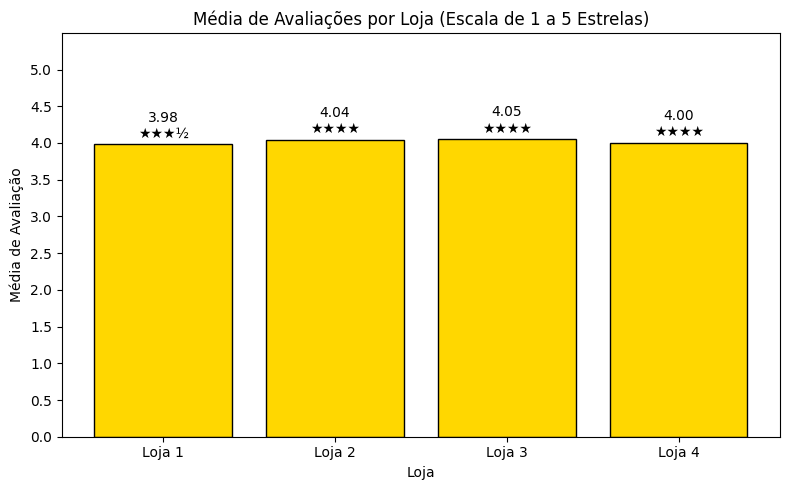

In [20]:
# Separar os nomes e valores
lojas = [item[0] for item in media_avaliacao_lojas]
medias = [item[1] for item in media_avaliacao_lojas]

# Configurar gráfico
plt.figure(figsize=(8, 5))
barras = plt.bar(lojas, medias, color='gold', edgecolor='black')

# Adiciona o valor numérico e estrelas como rótulo
for i, (barra, media) in enumerate(zip(barras, medias)):
    estrelas_cheias = int(media)
    meia_estrela = 0.5 if media - estrelas_cheias >= 0.25 else 0
    estrelas = '★' * estrelas_cheias + ('½' if meia_estrela else '')

    plt.text(barra.get_x() + barra.get_width()/2, barra.get_height() + 0.05,
             f'{media:.2f}\n{estrelas}', ha='center', va='bottom', fontsize=10)

# Limites e rótulos
plt.ylim(0, 5.5)
plt.title("Média de Avaliações por Loja (Escala de 1 a 5 Estrelas)")
plt.ylabel("Média de Avaliação")
plt.xlabel("Loja")
plt.yticks(np.arange(0, 5.5, 0.5))

# Melhora o layout para evitar cortes
plt.tight_layout()

# Exibe o gráfico
plt.show()
